## INSTALLING IMPORTANT LIBRARIES


In [3]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


## FETCHING DATASET


In [8]:
import pandas as pd
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,attrition,businesstravel,DailyRate,department,DistanceFromHome,Education,educationfield,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,yes,travel_rarely,1102,sales,1,2,life_sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,no,travel_frequently,279,research_&_development,8,1,life_sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,yes,travel_rarely,1373,research_&_development,2,2,other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,no,travel_frequently,1392,research_&_development,3,4,life_sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,no,travel_rarely,591,research_&_development,2,1,medical,7,1,...,3,4,1,6,3,3,2,2,2,2


## MISSING VALUES


In [11]:
print(df.isnull().sum())  # Check missing values

Age                         0
attrition                   0
businesstravel              0
DailyRate                   0
department                  0
DistanceFromHome            0
Education                   0
educationfield              0
EmployeeNumber              0
EnvironmentSatisfaction     0
gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
jobrole                     0
JobSatisfaction             0
maritalstatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
overtime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


## DATA TYPES AND OTHER INFO

In [14]:
print(df.info())  # Check data types
print(df.describe())  # Summary stats for numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  jobrole                 

##  CATEGORIAL DATA INTO NUMERIC FORM

In [18]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns (that contain strings)
categorical_cols = df.select_dtypes(include=["object"]).columns

# Initialize LabelEncoder
label_enc = LabelEncoder()

# Apply LabelEncoder only to categorical columns
for col in categorical_cols:
    try:
        df[col] = label_enc.fit_transform(df[col].astype(str))  # Convert to string before encoding
    except Exception as e:
        print(f"Error encoding column {col}: {e}")

# Select only numeric columns
numeric_cols = df.select_dtypes(include=["number"]).columns

# Now group by attrition
df.groupby("attrition")[numeric_cols].mean()

,Age,attrition,businesstravel,DailyRate,department,DistanceFromHome,Education,educationfield,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
attrition,,,,,,,,,,,,,,,,,,,,,
0,37.561233,0.0,1.607461,812.504461,1.245742,8.915653,2.927007,2.231955,1027.656123,2.771290,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
1,33.607595,1.0,1.607595,750.362869,1.337553,10.632911,2.839662,2.329114,1010.345992,2.464135,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


## VISUALIZATIONS


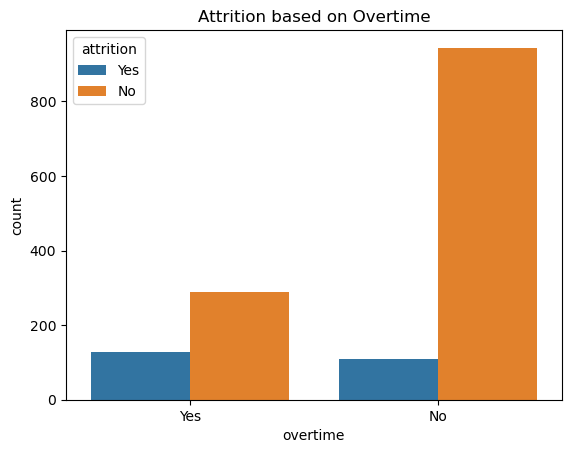

In [21]:
# Convert encoded categorical columns back to their original category names for visualization
df["overtime"] = df["overtime"].map({0: "No", 1: "Yes"})
df["attrition"] = df["attrition"].map({0: "No", 1: "Yes"})

# Now plot the countplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="overtime", hue="attrition", data=df)
plt.title("Attrition based on Overtime")
plt.show()


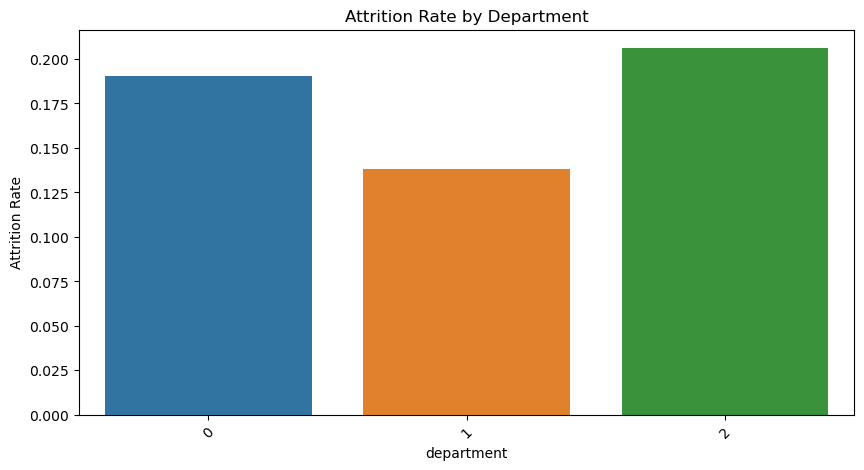

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'attrition' back to numeric if needed
df["attrition"] = df["attrition"].map({"Yes": 1, "No": 0})

# Calculate attrition rate per department
attrition_rate = df.groupby("department")["attrition"].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x="department", y="attrition", data=attrition_rate)
plt.title("Attrition Rate by Department")
plt.xticks(rotation=45)
plt.ylabel("Attrition Rate")
plt.show()


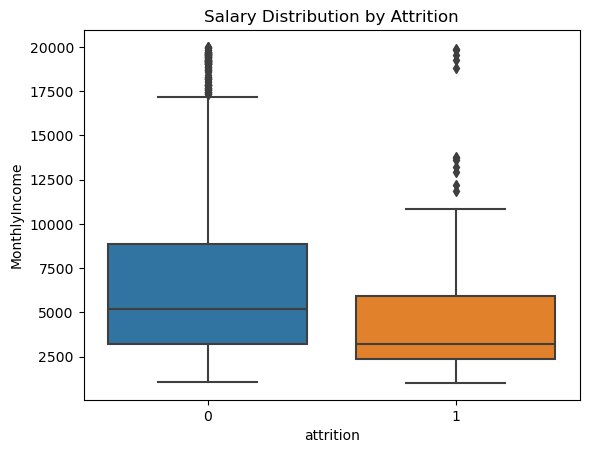

In [26]:
sns.boxplot(x="attrition", y="MonthlyIncome", data=df)
plt.title("Salary Distribution by Attrition")
plt.show()


E:\PYTHON\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


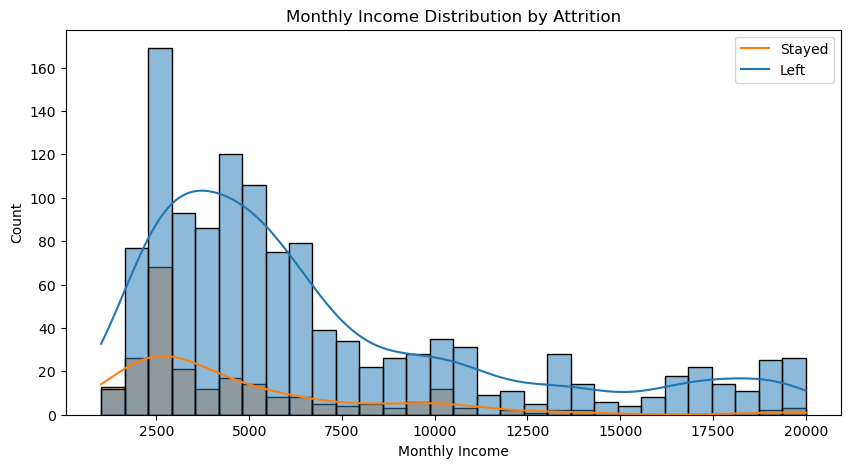

In [51]:
import numpy as np

# Replace inf values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values (optional)
df.dropna(inplace=True)
plt.figure(figsize=(10, 5))
sns.histplot(df, x="MonthlyIncome", hue="attrition", kde=True, bins=30)
plt.title("Monthly Income Distribution by Attrition")
plt.xlabel("Monthly Income")
plt.ylabel("Count")
plt.legend(["Stayed", "Left"])
plt.show()

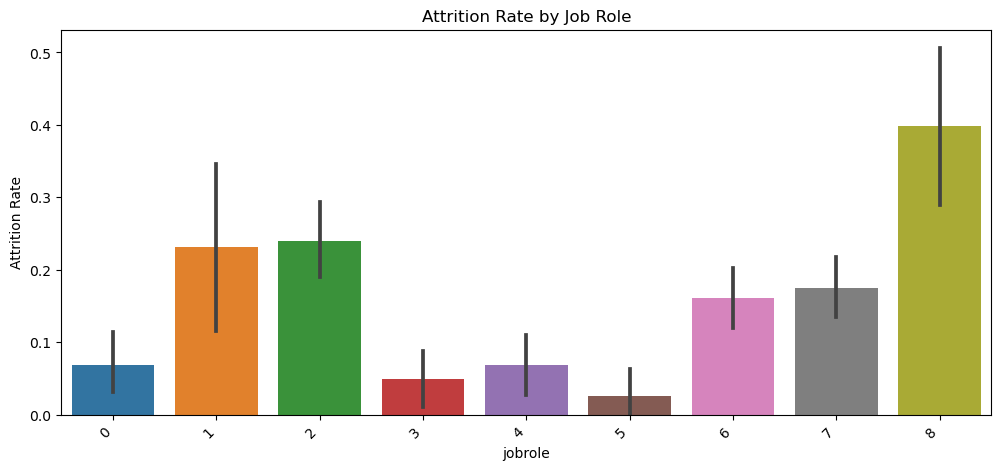

In [32]:
plt.figure(figsize=(12, 5))
sns.barplot(x=df["jobrole"], y=df["attrition"].apply(lambda x: 1 if x == 1 else 0))
plt.title("Attrition Rate by Job Role")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Attrition Rate")
plt.show()


## ATTRITION PREDICTION

## Converting categorical data into Numeric

In [40]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
df["attrition"] = label_enc.fit_transform(df["attrition"])  # Yes = 1, No = 0
df["overtime"] = label_enc.fit_transform(df["overtime"])
df["businesstravel"] = label_enc.fit_transform(df["businesstravel"])
df["department"] = label_enc.fit_transform(df["department"])
df["jobrole"] = label_enc.fit_transform(df["jobrole"])
df["educationfield"] = label_enc.fit_transform(df["educationfield"])
df["maritalstatus"] = label_enc.fit_transform(df["maritalstatus"])


## Select features (X) and target (y):

In [43]:
X = df.drop(columns=["attrition", "EmployeeNumber"])  # Features
y = df["attrition"]  # Target variable

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Standardize numerical features to improve model convergence
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming X is your feature matrix

# Increase max_iter to allow more iterations for convergence
log_reg = LogisticRegression(max_iter=500, solver='lbfgs')
log_reg.fit(X_scaled, y)  # Assuming y is your target variable

LogisticRegression(max_iter=500)

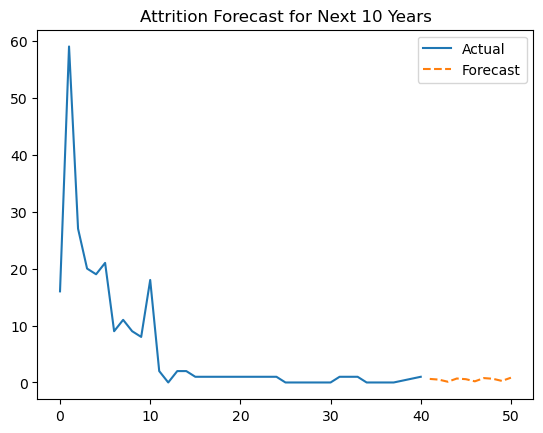

In [47]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df_time = df.groupby("YearsAtCompany")["attrition"].sum().reset_index()

# Train time series model
model = ExponentialSmoothing(df_time["attrition"], trend="add", seasonal="add", seasonal_periods=3)
fit = model.fit()

# Forecast next 10 years
future_years = list(range(df_time["YearsAtCompany"].max() + 1, df_time["YearsAtCompany"].max() + 11))
future_preds = fit.forecast(steps=10)

plt.plot(df_time["YearsAtCompany"], df_time["attrition"], label="Actual")
plt.plot(future_years, future_preds, label="Forecast", linestyle="dashed")
plt.title("Attrition Forecast for Next 10 Years")
plt.legend()
plt.show()